# The PageRank algorithm, as used by the Google search engine, exploits the linkage structure of the web to compute global “importance” scores that can be used to inﬂuence the ranking of search results. Here, we use random walk to simulate PageRank.

In [15]:
library('igraph')
library('Matrix')
library('pracma')
library('ggpubr')

# Question 3.a
Create such a network using m = 4. Measure the probability that the walker visits each node. Is this probability related to the degree of the nodes? 

In [16]:
#create directed random network with 1000 nodes using preferential attachment model
# with m=4
n=1000
g=barabasi.game(n=n,m=4,directed=TRUE)
g_org=barabasi.game(n=n,m=4, directed=TRUE)
#generate a index list of all nodes
vertice_list=seq(1,n)
#generate a new index of a permutated vertices id, use sample to shuffle vertices id
g_per=permute(g,sample(n))
#obtain edge list of original graph, the returned object is a matrix
#where each row has two element indicated the start node and end node
edge_list=t(as_edgelist(g_per))
#combine two graphs together according to edge information
g_combine=add_edges(g_org,edge_list)


In [17]:
#define helper function to extract transition matrix
transition_mat=function(g){
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)

}

#define helper function to do random walk task
random_walk=function(g,step_max,start_node,transition_matrix=NULL){
    if (is.null(transition_matrix)){
        transition_matrix=transition_mat(g)
    }
    v=start_node
    end_list=vector(mode='numeric',length=step_max)
    for (i in 1:step_max){
        prob=transition_matrix[v,]
        v=sample(1:vcount(g),1,prob=prob)
        #redefine start node
        end_list[i]=v
    }
    return (end_list)
}



In [36]:
#extract degree of nodes
degree=degree(g_combine)
#measure the probability that the walker visits each node
transition_matrix=transition_mat(g_combine)
iteration=1000
step_max=100
page_bank=vector(mode='numeric',length=vcount(g_combine))
for (i in 1:iteration){
    #randomly choose a start node
    start_node=sample(1:vcount(g_combine),1)
    #process random walk function and save end point
    end_list=random_walk(g_combine,step_max,start_node,transition_matrix)
    #count of the visitation of node + 1 
        for (i in end_list){
    page_bank[i]=page_bank[i]+1
            }
    
}


[1] 1

Call:
lm(formula = page_bank_prob ~ degree)

Coefficients:
(Intercept)       degree  
 -0.0017249    0.0001707  



[1] 0.9251618

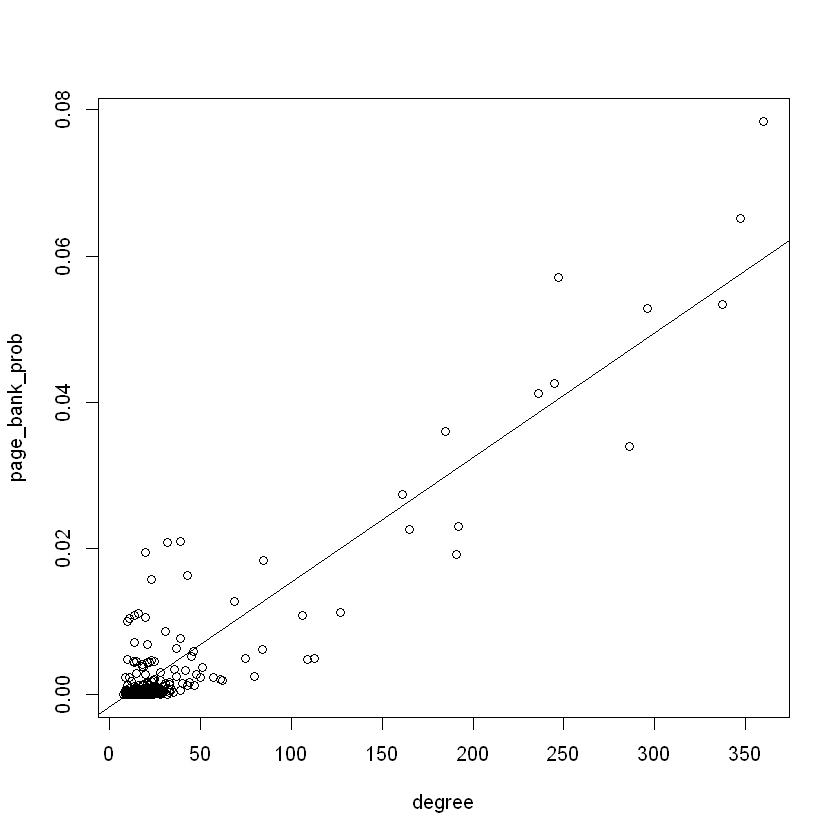

In [37]:
page_bank_prob=page_bank/(iteration*step_max)
print(sum(page_bank_prob))
#Fit a linear model
model=lm(page_bank_prob~degree)
plot(degree,page_bank_prob,abline(model))
print(model)
cor(degree,page_bank_prob,method=c('pearson'))

# Question 3.b
In all previous questions, we didn’t have any teleportation. Now, we use a teleportation probability of α = 0.15. By performing random walks on the network created in 3(a), measure the probability that the walker visits each node. Is this probability related to the degree of the node

In [38]:
#define helper function to do random walk task
random_walk_tele=function(g,step_max,start_node,transition_matrix=NULL,tele_prob=NULL){
    if (is.null(transition_matrix)){
        transition_matrix=transition_mat(g)
    }
    if (is.null(tele_prob)){
        tele_prob=rep(1/vcount(g),vcount(g))
    }
    v=start_node
    end_list=vector(mode='numeric',length=step_max)
    for (i in 1:step_max){
        prob=transition_matrix[v,]
        v_org=sample(1:vcount(g),1,prob=prob)
        v_tele=sample(1:vcount(g),1,prob=tele_prob)
        seed=sample(1:100,1)
        if(seed<=15 || degree(g,v,mode='out')==0){
            v=v_tele
        }else{
            v=v_org
        }
        end_list[i]=v
    }
    return (end_list)
}

In [40]:
#extract degree of nodes
degree=degree(g_combine)
#measure the probability that the walker visits each node
transition_matrix=transition_mat(g_combine)
iteration=1000
step_max=100
page_bank=vector(mode='numeric',length=vcount(g_combine))
for (i in 1:iteration){
    #randomly choose a start node
    start_node=sample(1:vcount(g_combine),1)
    #process random walk function and save end point
    end_list=random_walk_tele(g_combine,step_max,start_node,transition_matrix)
    #count of the visitation of node + 1 
            for (i in end_list){
    page_bank[i]=page_bank[i]+1
            }
    
}


[1] 1

Call:
lm(formula = page_bank_prob ~ degree)

Coefficients:
(Intercept)       degree  
 -0.0012195    0.0001391  



[1] 0.9452163

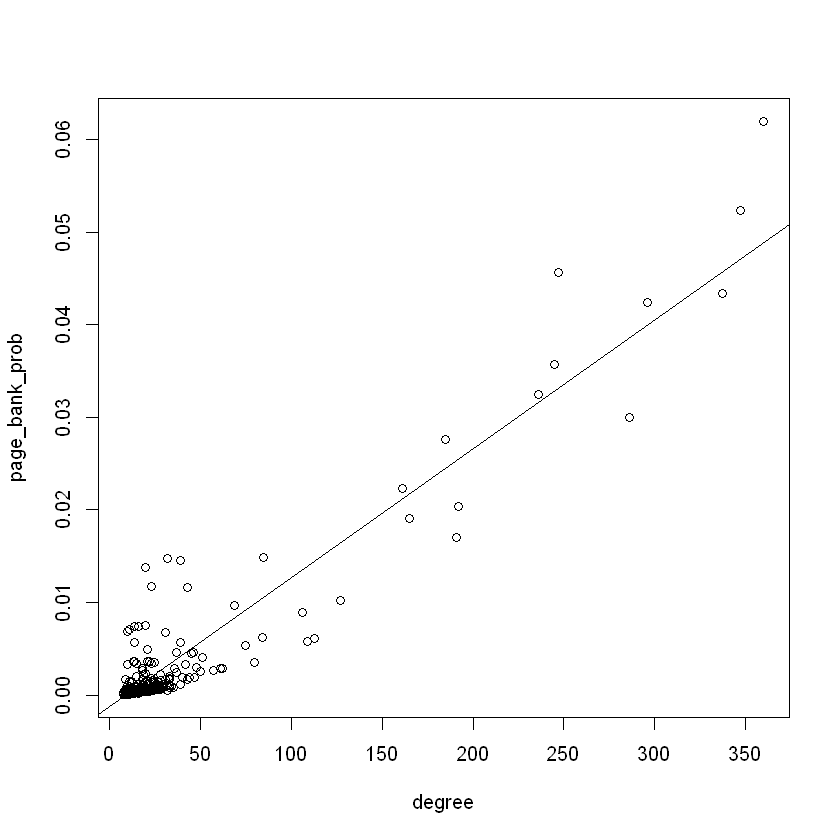

In [42]:
page_bank_prob=page_bank/(iteration*step_max)
#Fit a linear model
print(sum(page_bank_prob))
model=lm(page_bank_prob~degree)
plot(degree,page_bank_prob,abline(model))
print(model)
cor(degree,page_bank_prob,method=c('pearson'))